In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from scipy import stats
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score , accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier

In [68]:
df = pd.read_csv("C:/Users/Shahbaz Baig/Desktop/train.csv" , usecols = ['GarageQual' , 'FireplaceQu' , 'SalePrice']) # this is advance regression dataset

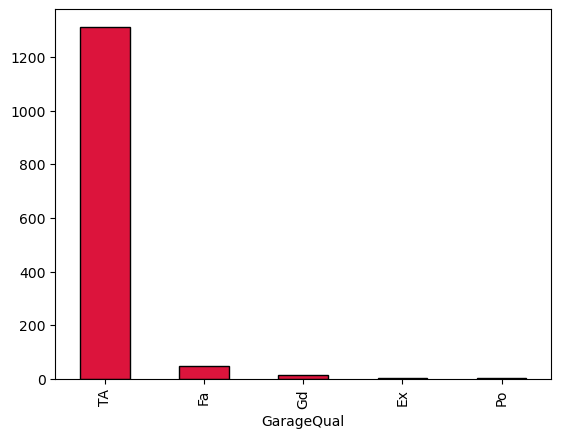

In [3]:
df['GarageQual'].value_counts().plot(kind = 'bar' , color='crimson', edgecolor='black')
plt.show()

In [4]:
df['GarageQual'].isnull().mean()*100

5.5479452054794525

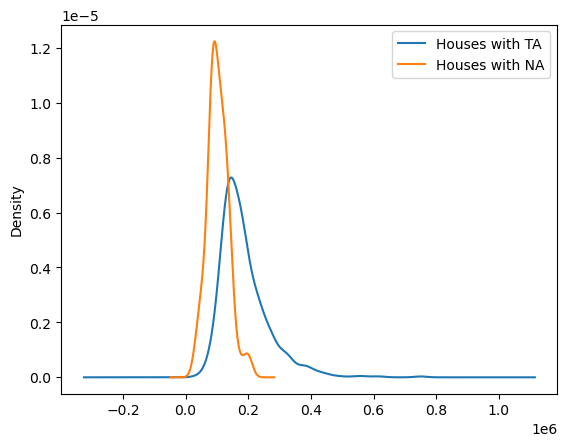

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind = 'kde' , ax = ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind = 'kde' , ax = ax)

lines , labels = ax.get_legend_handles_labels()
labels = ['Houses with TA' , 'Houses with NA']
ax.legend(lines,labels , loc = 'best')
plt.show()

In [6]:
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [24]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [28]:
df['GarageQual'].fillna('TA', inplace = True)

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_9116\2652256314.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA', inplace = True)


<Axes: xlabel='GarageQual'>

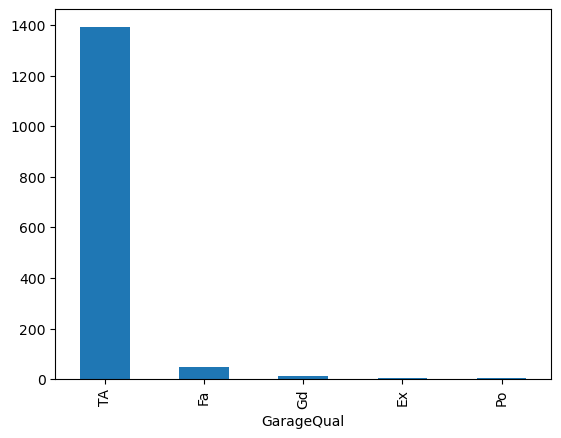

In [30]:
df['GarageQual'].value_counts().plot(kind = 'bar')

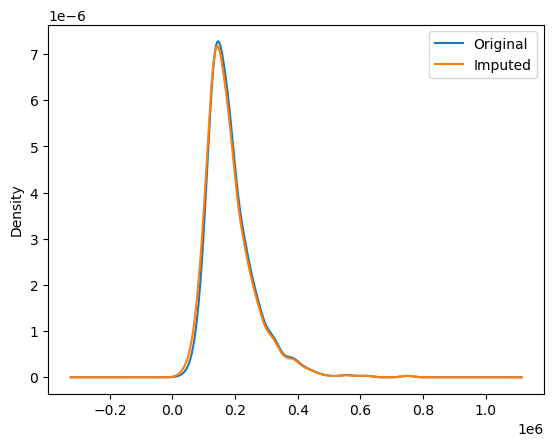

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
# df[df['GarageQual']=='TA']['SalePrice'].plot(kind = 'kde' , ax = ax)
temp.plot(kind = 'kde')
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde' , ax = ax)

lines , labels = ax.get_legend_handles_labels()
labels = ['Original' , 'Imputed']
ax.legend(lines,labels , loc = 'best')
plt.show()
# so the result is almost same before and after

<Axes: xlabel='FireplaceQu'>

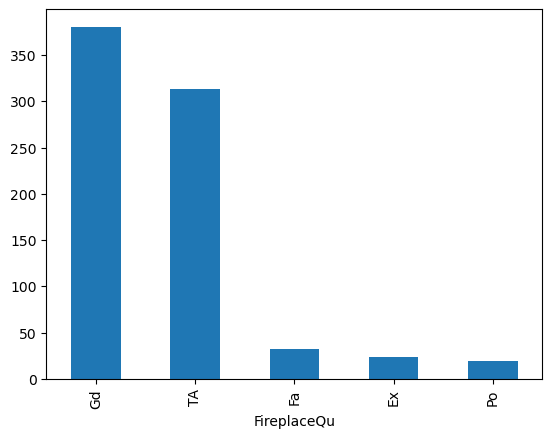

In [20]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')

In [22]:
df['FireplaceQu'].isnull().mean()*100

47.26027397260274

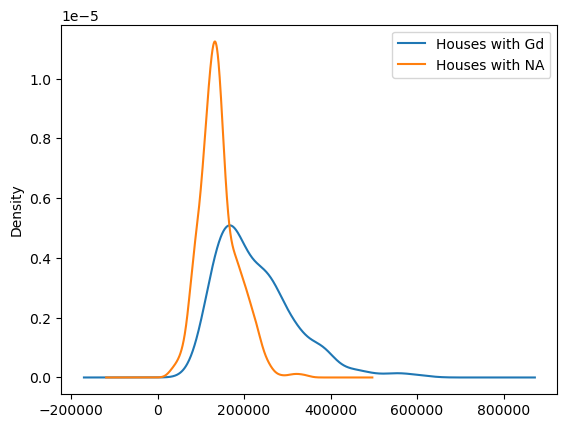

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind = 'kde' , ax = ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind = 'kde' , ax = ax)

lines , labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd' , 'Houses with NA']
ax.legend(lines,labels , loc = 'best')
plt.show()

In [46]:
df['GarageQual'].isnull().sum().ndim  # so its dimension is zero

0

# fill this column using the same imputation method

# **Using Sklearn**

In [59]:
x_train , x_test , y_train , y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size = 0.2)

In [61]:
imputer = SimpleImputer(strategy='most_frequent')

In [63]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [65]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

# **Missing Value Imputation with "Missing Word"**

In [70]:
df['GarageQual'].isnull().sum()

81

In [72]:
df['GarageQual'].fillna('Missing' , inplace = True) 

C:\Users\Shahbaz Baig\AppData\Local\Temp\ipykernel_9116\644541666.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('Missing' , inplace = True)


In [76]:
df['GarageQual'].isnull().sum()

0

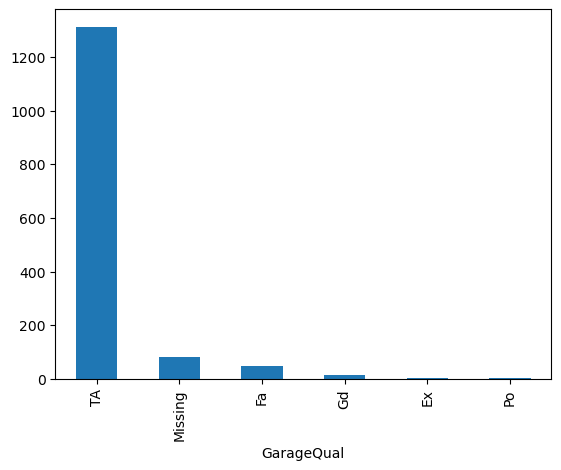

In [80]:
df['GarageQual'].value_counts().plot(kind = 'bar')
plt.show()

# **Using Sklearn**

In [83]:
x_train , x_test , y_train , y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size = 0.2)


In [85]:
imputer = SimpleImputer(strategy='constant' , fill_value='Missing')

In [87]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [89]:
imputer.statistics_


array(['Missing', 'Missing'], dtype=object)